In [1]:
import sys
print(sys.executable)
import wordcloud
#!<E:\Anaconda\python.exe>/python -m pip install wordcloud
#!pip install sklearn


E:\Anaconda\python.exe


In [2]:
#!pip install seaborn
#!pip install matplotlib

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
import pandas as pd
dataset = pd.read_csv(r"C:\Users\rahul\Desktop\BBC News Train.csv")
dataset.Text[2]

'enron bosses in $168m payout eighteen former enron directors have agreed a $168m (£89m) settlement deal in a shareholder lawsuit over the collapse of the energy firm.  leading plaintiff  the university of california  announced the news  adding that 10 of the former directors will pay $13m from their own pockets. the settlement will be put to the courts for approval next week. enron went bankrupt in 2001 after it emerged it had hidden hundreds of millions of dollars in debt.  before its collapse  the firm was the seventh biggest public us company by revenue. its demise sent shockwaves through financial markets and dented investor confidence in corporate america.   the settlement is very significant in holding these outside directors at least partially personally responsible   william lerach  the lawyer leading the class action suit against enron  said.  hopefully  this will help send a message to corporate boardrooms of the importance of directors performing their legal duties   he add

In [8]:
dataset.shape

(1323, 3)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 3 columns):
ArticleId    1323 non-null int64
Text         1323 non-null object
Category     1323 non-null object
dtypes: int64(1), object(2)
memory usage: 31.1+ KB


In [10]:
dataset['Category'].value_counts()

entertainment    273
business         269
sport            265
tech             261
politics         255
Name: Category, dtype: int64

In [11]:
# Associate Category names with numerical index and save it in new column CategoryId
target_category = dataset['Category'].unique()
print(target_category)

['business' 'tech' 'entertainment' 'sport' 'politics']


In [12]:
dataset['CategoryId'] = dataset['Category'].factorize()[0]
dataset.head()

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,1976,lifestyle governs mobile choice faster bett...,tech,1
2,917,enron bosses in $168m payout eighteen former e...,business,0
3,1797,french honour for director parker british film...,entertainment,2
4,1866,fockers fuel festive film chart comedy meet th...,entertainment,2


In [13]:
# Create a new pandas dataframe "category", which only has unique Categories, also sorting this list in order of CategoryId values
category = dataset[['Category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
category

,Category,CategoryId
0,business,0
1,tech,1
3,entertainment,2
8,sport,3
37,politics,4


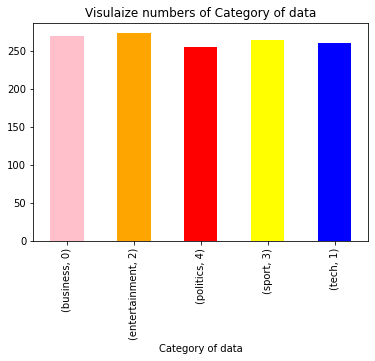

In [14]:
dataset.groupby('Category').CategoryId.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

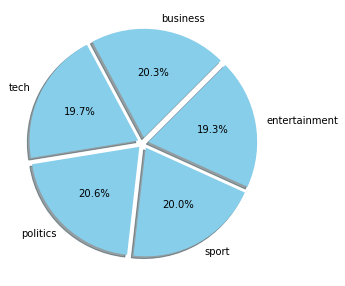

In [15]:
fig = plt.figure(figsize = (5,5))
colors = ["skyblue"]
business = dataset[dataset['CategoryId'] == 0 ]
tech = dataset[dataset['CategoryId'] == 1 ]
politics = dataset[dataset['CategoryId'] == 2]
sport = dataset[dataset['CategoryId'] == 3]
entertainment = dataset[dataset['CategoryId'] == 4]
count = [business['CategoryId'].count(), tech['CategoryId'].count(), politics['CategoryId'].count(), sport['CategoryId'].count(), entertainment['CategoryId'].count()]
pie = plt.pie(count, labels = ['business', 'tech', 'politics', 'sport', 'entertainment'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05,0.05))

In [16]:
from wordcloud import WordCloud

stop = set(stopwords.words('english'))

business = dataset[dataset['CategoryId'] == 0]

business = business['Text']

tech = dataset[dataset['CategoryId'] == 1]

tech = tech['Text']

politics = dataset[dataset['CategoryId'] == 2]

politics = politics['Text']

sport = dataset[dataset['CategoryId'] == 3]

sport = sport['Text']

entertainment = dataset[dataset['CategoryId'] == 4]

entertainment = entertainment['Text']



ModuleNotFoundError: No module named 'wordcloud'

In [17]:
text = dataset["Text"]
text.head(10)

0    worldcom ex-boss launches defence lawyers defe...
1    lifestyle  governs mobile choice  faster  bett...
2    enron bosses in $168m payout eighteen former e...
3    french honour for director parker british film...
4    fockers fuel festive film chart comedy meet th...
5    housewives lift channel 4 ratings the debut of...
6    uk coal plunges into deeper loss shares in uk ...
7    bp surges ahead on high oil price oil giant bp...
8    ireland 21-19 argentina an injury-time dropped...
9    wenger signs new deal arsenal manager arsene w...
Name: Text, dtype: object

In [18]:
category = dataset['Category']
category.head(10)

0         business
1             tech
2         business
3    entertainment
4    entertainment
5    entertainment
6         business
7         business
8            sport
9            sport
Name: Category, dtype: object

In [19]:
def remove_tags(text):
  remove = re.compile(r'')
  return re.sub(remove, '', text)
dataset['Text'] = dataset['Text'].apply(remove_tags)
dataset['Text']

0       worldcom ex-boss launches defence lawyers defe...
1       lifestyle  governs mobile choice  faster  bett...
2       enron bosses in $168m payout eighteen former e...
3       french honour for director parker british film...
4       fockers fuel festive film chart comedy meet th...
                              ...                        
1318    double eviction from big brother model caprice...
1319    dj double act revamp chart show dj duo jk and ...
1320    weak dollar hits reuters revenues at media gro...
1321    apple ipod family expands market apple has exp...
1322    santy worm makes unwelcome visit thousands of ...
Name: Text, Length: 1323, dtype: object

In [20]:
#def special_char(text):
 # reviews = ''
 #  if x.isalnum():
  #    reviews = reviews + x
   # else:
    #  reviews = reviews + ' '
    #return reviews

#dataset['Text'] = dataset['Text'].apply(special_char)
#dataset['Text']

In [21]:
def convert_lower(text):
     return text.lower()
dataset['Text'] = dataset['Text'].apply(convert_lower)

In [22]:
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]
dataset['Text'] = dataset['Text'].apply(remove_stopwords)
dataset

,ArticleId,Text,Category,CategoryId
0,1833,"[worldcom, ex-boss, launches, defence, lawyers...",business,0
1,1976,"[lifestyle, governs, mobile, choice, faster, b...",tech,1
2,917,"[enron, bosses, $, 168m, payout, eighteen, for...",business,0
3,1797,"[french, honour, director, parker, british, fi...",entertainment,2
4,1866,"[fockers, fuel, festive, film, chart, comedy, ...",entertainment,2
...,...,...,...,...
1318,857,"[double, eviction, big, brother, model, capric...",entertainment,2
1319,325,"[dj, double, act, revamp, chart, show, dj, duo...",entertainment,2
1320,1590,"[weak, dollar, hits, reuters, revenues, media,...",business,0
1321,1587,"[apple, ipod, family, expands, market, apple, ...",tech,1


In [23]:
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])
dataset['Text'] = dataset['Text'].apply(lemmatize_word)
dataset

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex-boss launch defence lawyer defendi...,business,0
1,1976,lifestyle governs mobile choice faster better ...,tech,1
2,917,enron boss $ 168m payout eighteen former enron...,business,0
3,1797,french honour director parker british film dir...,entertainment,2
4,1866,fockers fuel festive film chart comedy meet fo...,entertainment,2
...,...,...,...,...
1318,857,double eviction big brother model caprice holb...,entertainment,2
1319,325,dj double act revamp chart show dj duo jk joel...,entertainment,2
1320,1590,weak dollar hit reuters revenue medium group r...,business,0
1321,1587,apple ipod family expands market apple expande...,tech,1


In [24]:
print(dataset)

      ArticleId                                               Text  \
0          1833  worldcom ex-boss launch defence lawyer defendi...   
1          1976  lifestyle governs mobile choice faster better ...   
2           917  enron boss $ 168m payout eighteen former enron...   
3          1797  french honour director parker british film dir...   
4          1866  fockers fuel festive film chart comedy meet fo...   
...         ...                                                ...   
1318        857  double eviction big brother model caprice holb...   
1319        325  dj double act revamp chart show dj duo jk joel...   
1320       1590  weak dollar hit reuters revenue medium group r...   
1321       1587  apple ipod family expands market apple expande...   
1322        538  santy worm make unwelcome visit thousand websi...   

           Category  CategoryId  
0          business           0  
1              tech           1  
2          business           0  
3     entertainment    

In [25]:
x = dataset['Text']
y = dataset['CategoryId']
type(x[0])

str

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(dataset.iloc[:,0].values)
y = np.array(dataset.CategoryId.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(dataset.Text).toarray()
print(type(dataset.Text))
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

<class 'pandas.core.series.Series'>
X.shape =  (1323, 5000)
y.shape =  (1323,)


In [27]:
def change_text(text):
    text = remove_tags(text)
    text = convert_lower(text)
    text = remove_stopwords(text)
    text = lemmatize_word(text)
    return text

text_out = change_text('covid 19')
type(text_out)

str

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

926
397


In [29]:
classifier =RandomForestClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
# Performance metrics

accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

# Get precision, recall, f1 scores

precision, recall, f1score, support = score(y_test, y_pred, average='micro')

print(f'Test Accuracy Score of Basic Random Forest {accuracy}')

print(f'Precision : {precision}')

print(f'Recall : {recall}')

#print(f'F1-score : {f1score}')



Test Accuracy Score of Basic Random Forest 94.21
Precision : 0.9420654911838791
Recall : 0.9420654911838791


In [30]:
#model_performance = pd.DataFrame(data=perform_list)
#model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
#model_performance

In [31]:
#y_pred1 = cv.transform(['Worldwide oil prices at an all time high due to covid'])
user = input("Enter a Text:")
my_prediction = change_text(user)
my_prediction = pd.Series(my_prediction)

#my_prediction = my_prediction.ravel()
new = cv.transform(my_prediction)

yy = classifier.predict_proba(new)

#if(yy==0 || yy==1)
#print("highest chance:Business ,Second Highest:")
print(yy)

#list1 = np.array([["Business","Tech","Politics","Sports","Entertainment"]])
#list2 = np.concatenate((yy, list1), axis=0)
#print(list2)
#print(list2.shape)
#for i in range(0,5):
#    print(list2[0][i] ," ", list2[1][i])
#business -0
#tech-1
#politics-2
#sport-3
#entertainment-4

Enter a Text:
[[0.06 0.   0.25 0.61 0.08]]


# OUTPUT

In [32]:
list1 = np.array([["Business","Tech"," Politics","Sports","Entertainment"]])
list2 = np.concatenate((yy, list1), axis=0)
print(list2)
print(list2.shape)

[['0.06' '0.0' '0.25' '0.61' '0.08']
 ['Business' 'Tech' ' Politics' 'Sports' 'Entertainment']]
(2, 5)


In [33]:
for i in range(0,5):
    print(list2[0][i] ," ", list2[1][i])

0.06   Business
0.0   Tech
0.25    Politics
0.61   Sports
0.08   Entertainment


In [34]:

#listf=['Business','Tech','Politics','Sports','Entertainment']
#dat = list(zip(yy,listf))
#dat

In [35]:
from joblib import dump, load

In [36]:
dump(classifier, 'model.joblib')

['model.joblib']

In [38]:
import pickle
pickle.dump(classifier,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))
